## Assignment
#### Implementation of Linear Regression using gradient descent W/O any inbuilt libraries. 
Rishiraj Adhikary || github.com/rishi-a


In [1]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

In [2]:
#load the data X and the values Y
X = load_boston().data
Y = load_boston().target

In [3]:
#feature scale the data
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

In [4]:
#Adding the intercept term to the data.
#Column dimension will change to incorporate the intercept term
X = np.hstack((np.ones((X.shape[0],1),dtype=X.dtype),X))
X.shape

(506, 14)

In [5]:
#This function computes the error. Our objective shall be to minimize this error using Gradient Descent
def computeCost(X, Y, h):
    m = len(Y)
    J = sum((np.matmul(X,h)-Y)**2)/(2*len(Y))
    return J


#Gradient Descent implementation
def gradientDescent(X,Y,alpha,iterations):
    optiJ = 500; #high random value assigned. This value will be replaced by optimum value
    optiH = [];
    for j in range(0,iterations):
        h[0] = h[0] - alpha*(1/len(Y))*sum((np.matmul(X,h)-Y))
        for i in range(1,X.shape[1]):
            h[i] = h[i] - alpha*(1/len(Y))*sum(   (np.matmul(X,h)-Y)*X[:,i]  )
        J = computeCost(X,Y,h)
        if J < optiJ:
            optiJ = J
            optiH = h
        JCost.append(J);
        Xaxis.append(j)
        #print("Optimal Vector Repr of The Line = ",h)
        #print("Cost Function Value = ", J)
        #print("\n\n")
    return optiH
        
#Parameters for gradient descent.             
alpha = 0.001
iterations = 3000
h = np.zeros(14)
JCost = []
Xaxis = []
H = gradientDescent(X,Y,alpha,iterations)  
print(H)

[21.41264658 -0.61854096  0.48621974 -0.43626558  0.83858104 -0.70937178
  3.24126544 -0.15668675 -1.68782502  0.59810893 -0.42876757 -1.7693913
  0.85921134 -3.19829754]


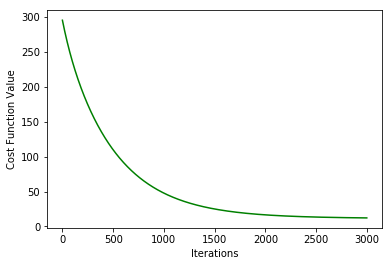

In [6]:
#plotting the curve between cost function and number of iterations.
line1, = plt.plot(Xaxis, JCost, 'green', label="Cost Function Vs Iterations")
plt.ylabel('Cost Function Value')
plt.xlabel('Iterations')
plt.show()


### Observation
Cost function stabilizes at 260 after, say 2000 iterations. We will take the corresponding Vector, H, and predict the output

In [7]:
#optimal Vector H that gives least value of cost function
#h = [-0.66968392,0.59293914,-0.38034335,0.78096686,-1.04799793,3.14035019,-0.15467863,-2.16282702,0.92733704,-0.53757538,-1.84798915,0.89919824,-3.45526041]
# H = optimal H vector found out using Gradient Descent.
predictedY = np.matmul(X,H)
print("MSE of predicted Error with Manual GD")
print(mean_squared_error(Y, predictedY))

MSE of predicted Error with Manual GD
24.5072513246772


In [9]:
clf = SGDRegressor()
clf.fit(X, Y)
#Converting the values to list
predictedYlist = predictedY.tolist()
Ylist = Y.tolist()
predictedYlistSK = clf.predict(X).tolist()

In [10]:
#clf = SGDRegressor()
#clf.fit(X, Y)
print("MSE of predicted Error with SKlearn inbuilt function")
print(mean_squared_error(Y, clf.predict(X)))

MSE of predicted Error with SKlearn inbuilt function
22.732705401350866


In [11]:
print("Weight assigned by manual (my own) SGDRegressor to each Feature")
H

Weight assigned by manual (my own) SGDRegressor to each Feature


array([21.41264658, -0.61854096,  0.48621974, -0.43626558,  0.83858104,
       -0.70937178,  3.24126544, -0.15668675, -1.68782502,  0.59810893,
       -0.42876757, -1.7693913 ,  0.85921134, -3.19829754])

In [12]:
print("Weight assigned by SKlearn SGDRegressor to each Feature")
clf.coef_

Weight assigned by SKlearn SGDRegressor to each Feature


array([11.23498183, -0.73439144,  0.60715035, -0.43764371,  0.8678351 ,
       -1.12300685,  3.26554107, -0.16764676, -2.21662555,  0.91744342,
       -0.48750666, -1.90877247,  0.92822512, -3.48688299])

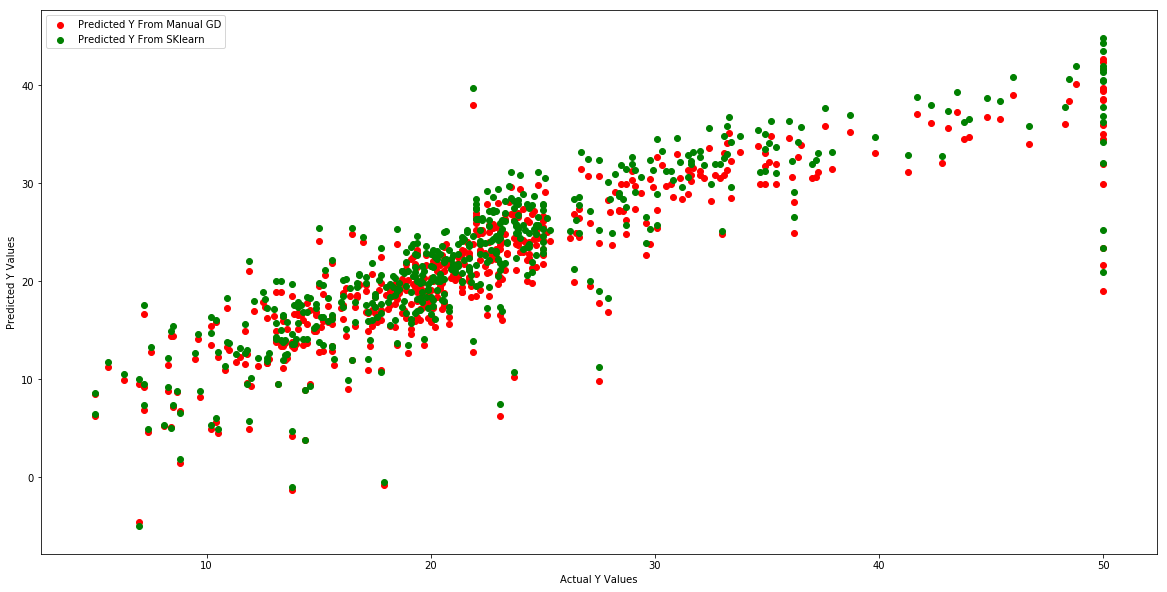

In [13]:
#Plotting the data
plt.figure(figsize=(20,10))
line1 = plt.scatter(Y, predictedY, color='red', label="Predicted Y From Manual GD")
line2 = plt.scatter(Y, clf.predict(X), color='green', label="Predicted Y From SKlearn")
#plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.legend(loc='upper left')
plt.ylabel('Predicted Y Values')
plt.xlabel('Actual Y Values')
plt.show()


In [14]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Actual Output Value", "Value By SKlearn", "Value By Manual LR and SGD"]
for i in range(0,506):  
    x.add_row([Ylist[i], predictedYlistSK[i], predictedYlist[i]])
print(x)


+---------------------+---------------------+----------------------------+
| Actual Output Value |   Value By SKlearn  | Value By Manual LR and SGD |
+---------------------+---------------------+----------------------------+
|         24.0        |  30.871592907786784 |     29.46649711941351      |
|         21.6        |  25.065989729389955 |     24.014004020814777     |
|         34.7        |  31.182641754815926 |     29.893665214943884     |
|         33.4        |  29.58865327009728  |     28.50410030144998      |
|         36.2        |  29.083572481434263 |     28.09259793055629      |
|         28.7        |  25.754770663218544 |     24.78706760088545      |
|         22.9        |  23.137100905070636 |     22.256713418648527     |
|         27.1        |  20.018537482811773 |      19.5137637853408      |
|         16.5        |  11.960573368800194 |     11.953855512739223     |
|         18.9        |  19.517789226900288 |     19.101260519507836     |
|         15.0        |  